In [ ]:
'''
   author : Tashi Chotso
'''

'\n   author : Tashi Chotso\n'

# Banking Market Campaign Analysis




## Problem Statement ?

 -  The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

## Task 
1. Perform Exploratory Data Analysis on the dataset using python.
2. Derive insights from the dataset and visualise using python libraries (eg - matplotlib or seaborn)
3. Predict if a customer will subscribe to term deposit.

## Approach
1. Import Necessary Packages
2. Data Preprocessing
3. Exploratory Data Analysis
   - Univariate Analysis
     - Analysis report
   - Bivariate and multivariateAnalysis
     - Analysis report
   - Correlation
4. Feature Engineering
   - Encoding
   - Scaling
   - Multicollinearity 
   - SMOTE Analysis
5. Modeling and Model Evaluation
   - Logistic Regression
   - RandomForestClassifier
   - XGboost Classifier
6. Conclusion 
   
## Bank Client Data:?

- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
- 10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

#### other attributes:
- 11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 13 - previous: number of contacts performed before this campaign and for this client (numeric)
- 14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes:
- 15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 16 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 18 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 19 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

- 20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 1. Import necessary packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
#scaling the data
from sklearn.preprocessing import MinMaxScaler
# Importing sklearn libraries needed
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

#model selection
from sklearn.model_selection import train_test_split
#model evaluation 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix


## 2. Data Preprocessing

In [ ]:
#load the dataset
dataset=pd.read_csv("/content/campaign_data.csv")
display(dataset.head())
print('There are {} records and {} features '.format(dataset.shape[0],dataset.shape[1]))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 41188 records and 20 features 


In [ ]:
#checking basic information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#checking if there is null
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#cheking if there is duplicate
dataset.duplicated().sum()

1784

In [ ]:
#summary of statistic
dataset.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#drop duplicated and reset index
dataset.drop_duplicates(subset=None,keep='first',inplace=True,ignore_index=True)

In [ ]:
#copy the dataframe
df=dataset.copy()

In [ ]:
#numerical data 
numdata=df.select_dtypes(exclude=['object'])
display(numdata.head(3))
display(numdata.shape)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0


(39404, 9)

In [ ]:
#statistic summary
numdata.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000
mean,40.116105,2.618744,960.847097,0.178738,0.064067,93.577538,-40.499604,3.601243,5165.986481
std,10.460328,2.814780,190.869184,0.503172,1.577041,0.583820,4.644327,1.742337,72.763866
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#categorical data
cate=df.select_dtypes(include=['object'])
display(cate.head(3))
print(cate.shape)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no


(39404, 11)


In [ ]:
# decriptive summary of category data
cate.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,39404,39404,39404,39404,39404,39404,39404,39404,39404,39404,39404
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9873,23869,11561,31135,20561,32248,24673,13315,8197,33858,34806


In [ ]:
#checking unique values
from collections import Counter
Counter(df['job'])

Counter({'admin.': 9873,
         'blue-collar': 8835,
         'entrepreneur': 1405,
         'housemaid': 1028,
         'management': 2820,
         'retired': 1683,
         'self-employed': 1386,
         'services': 3801,
         'student': 852,
         'technician': 6404,
         'unemployed': 992,
         'unknown': 325})

In [ ]:
Counter(df['marital'])

Counter({'divorced': 4459, 'married': 23869, 'single': 10997, 'unknown': 79})

In [ ]:
Counter(cate['poutcome'])

Counter({'failure': 4174, 'nonexistent': 33858, 'success': 1372})

In [ ]:
cate.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### 1. Insight from the dataset
- The dataset consist of 41188 records and 20 features
- 1784 records are duplicated
- There are 9 numberical columns 
- 11 are categorical columns

## 3. Expolartory Data Analysis
1. univariate analysis
2. bivariate and multivariate analysis
3. Correlation


### 3.1 Univariate Analysis

In [ ]:
# Distribution of deposit
deposit = cate['y'].value_counts()
label_deposit= deposit.index
size_deposit = deposit.values
colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_deposit, values = size_deposit, marker = dict(colors = colors), name = 'deposit', hole = 0.3)
df = [trace]
layout = go.Layout(
           title = 'Distribution of deposit')
fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

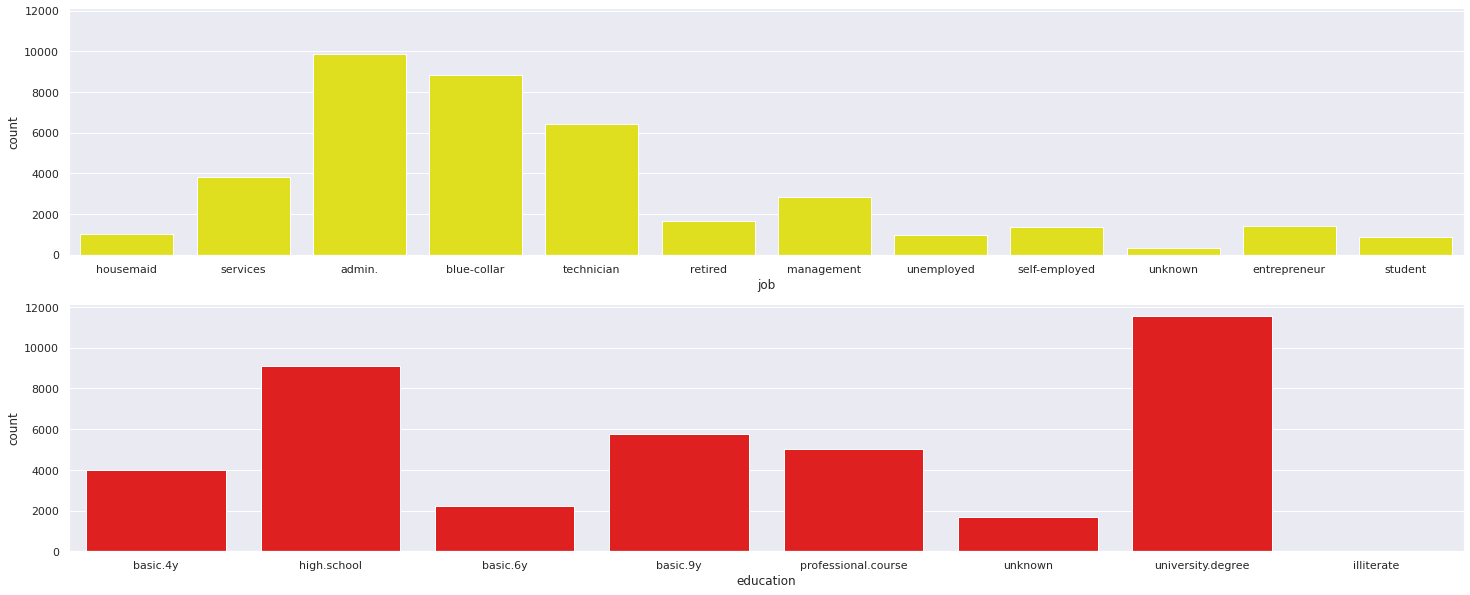

In [ ]:
# Plotting the countplot for the job and education
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)
sns.countplot("job", data=cate, ax=axes[0],color='yellow')
sns.countplot("education", data=cate, ax=axes[1],color='red')
plt.show()

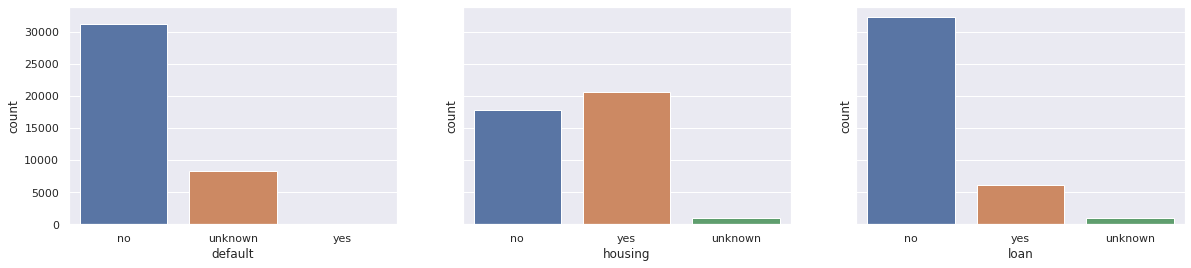

In [ ]:
# Plotting the countplot for the default, housing and loan
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

sns.countplot("default", data=cate, ax=axes[0])
sns.countplot("housing", data=cate, ax=axes[1])
sns.countplot("loan", data=cate, ax=axes[2])
plt.show()

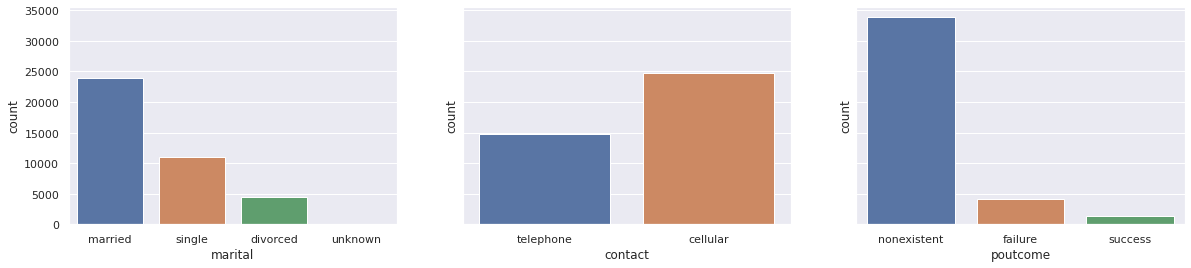

In [ ]:
#plotting the countplot for the marital , contact
sns.set(style='darkgrid')
fig, axes=plt.subplots(1,3, figsize=(20,4),sharey=True)
sns.countplot('marital',data=cate,ax=axes[0])
sns.countplot('contact',data=cate,ax=axes[1])
sns.countplot('poutcome',data=cate,ax=axes[2])
plt.show()

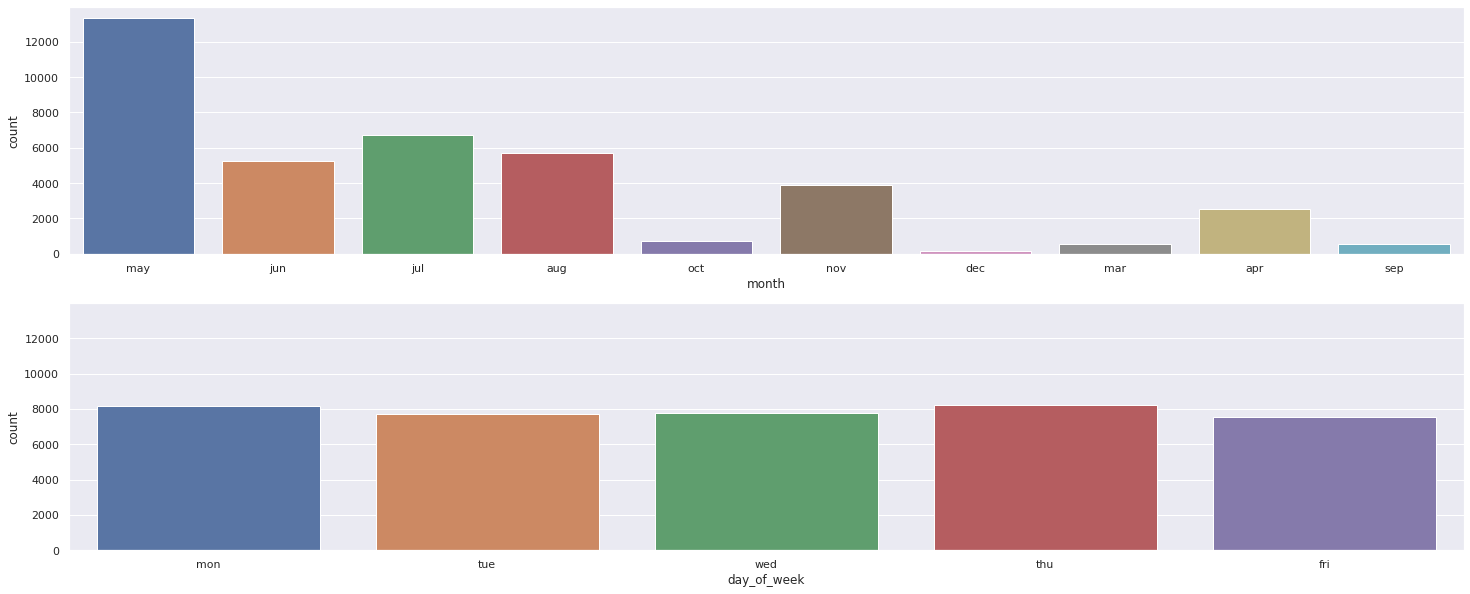

In [ ]:
#Plotting the countplot for the month, day-of-week
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)
sns.countplot("month", data=cate, ax=axes[0])
sns.countplot("day_of_week", data=cate, ax=axes[1])

Text(0.5, 0, '')

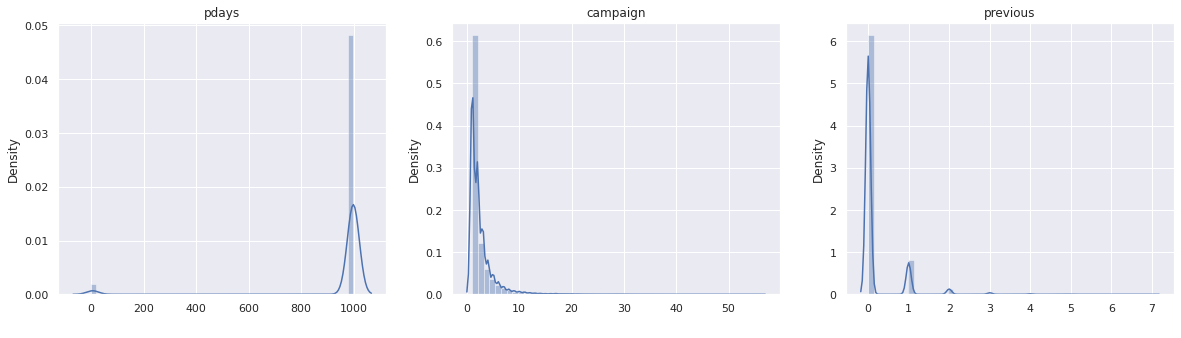

In [ ]:
# Distribution of pdays, compaign and previous
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig, (ax1, ax2,ax3) = plot_objects
sns.distplot(numdata["pdays"], bins=50 , ax=ax1)
ax1.set_title("pdays")
ax1.set_xlabel(" ")
sns.distplot(numdata["campaign"], bins=50 , ax=ax2)
ax2.set_title("campaign")
ax2.set_xlabel(" ")
sns.distplot(numdata['previous'],bins=50,ax=ax3)
ax3.set_title('previous')
ax3.set_xlabel('')


The basic statistics for the feature is :
 count    39404.000000
mean        40.116105
std         10.460328
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64
The number of unique values in the feature is : 78


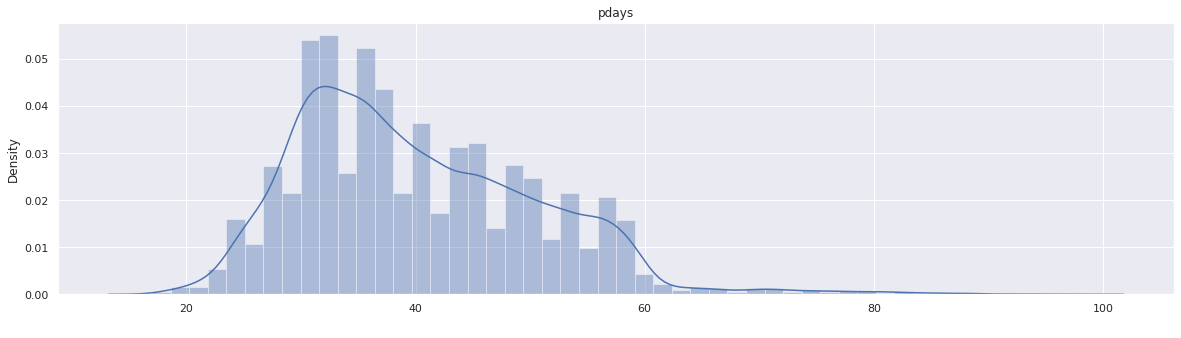

In [ ]:
# Checking feature "age" distribution
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(numdata["age"], bins=50 , ax=ax1)
ax1.set_title("pdays")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n",numdata["age"].describe())
print("The number of unique values in the feature is :", numdata["age"].nunique())

Text(0.5, 0, '')

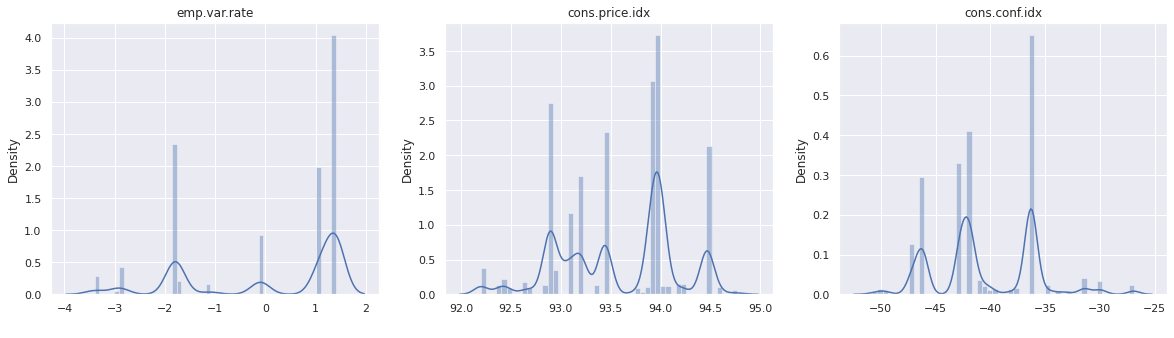

In [ ]:
#distribution of emp.var.rate,cons.price.idx, cons.conf.idex
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig, (ax1, ax2,ax3) = plot_objects

sns.distplot(numdata["emp.var.rate"], bins=50 , ax=ax1)
ax1.set_title("emp.var.rate")
ax1.set_xlabel(" ")

sns.distplot(numdata["cons.price.idx"], bins=50 , ax=ax2)
ax2.set_title("cons.price.idx")
ax2.set_xlabel(" ")

sns.distplot(numdata['cons.conf.idx'],bins=50,ax=ax3)
ax3.set_title('cons.conf.idx')
ax3.set_xlabel('')


The basic statistics for the feature is :
 count    39404.000000
mean         3.601243
std          1.742337
min          0.634000
25%          1.334000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
The number of unique values in the feature is : 316


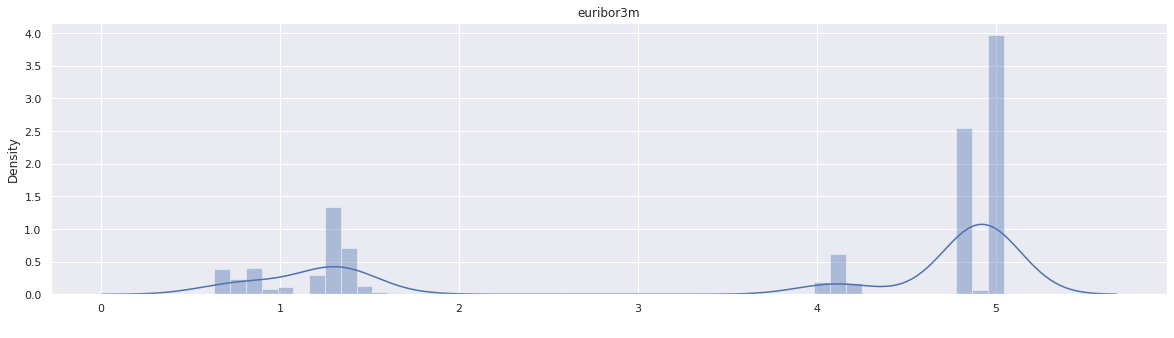

In [ ]:
# Distribution of euribor3m
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(numdata["euribor3m"], bins=50 , ax=ax1)
ax1.set_title("euribor3m")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n",numdata["euribor3m"].describe())
print("The number of unique values in the feature is :", numdata["euribor3m"].nunique())

The basic statistics for the feature is :
 count    39404.000000
mean      5165.986481
std         72.763866
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
The number of unique values in the feature is : 11


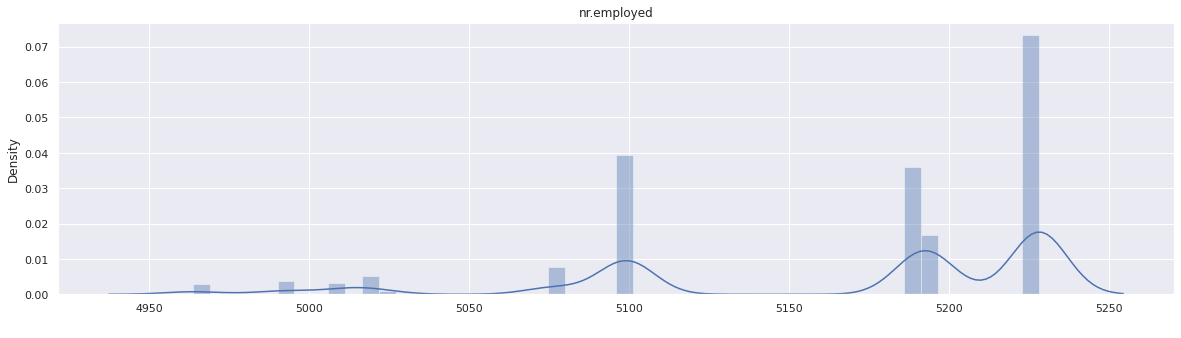

In [ ]:
#Distribution of nr.employed
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(numdata["nr.employed"], bins=50 , ax=ax1)
ax1.set_title("nr.employed")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n",numdata["nr.employed"].describe())
print("The number of unique values in the feature is :", numdata["nr.employed"].nunique())

#### 2. Insight from the dataset as general 
- There were 11.7% of clients who opened a deposit and 88.3% of clients who did not.
- The majority of respondents were administrators, followed by blue-collar workers and technicians. Unemployed  and housemaids were less likely to participate.
- There were more respondents with a university degree, followed by a high school certificate, a basic 9 diploma, and a professional training certificate. People who were illiterate participated rarely. 
- There have been no defaults on clients' credit cards. A larger percentage of clients took out housing loans compared to personal loans
- Married couples are more likely to respond than single or divorced clients. The majority of communication occurs via cell phone.
- The maximum number of respondents occurred in May and the least number of respondents occurred in December. In addition, the number of clients was the same throughout the day (business day) 
- During the campaign, the number of clients in contact is positively skewed. Most clients are contacting this campaign for the first time.
- Respondents may be as old as 98 and as young as 17, but most respondents are in their 40s. A positive skew was observed in the distribution of the data.



## 3.2  Bivariate and Multivariate Analysis

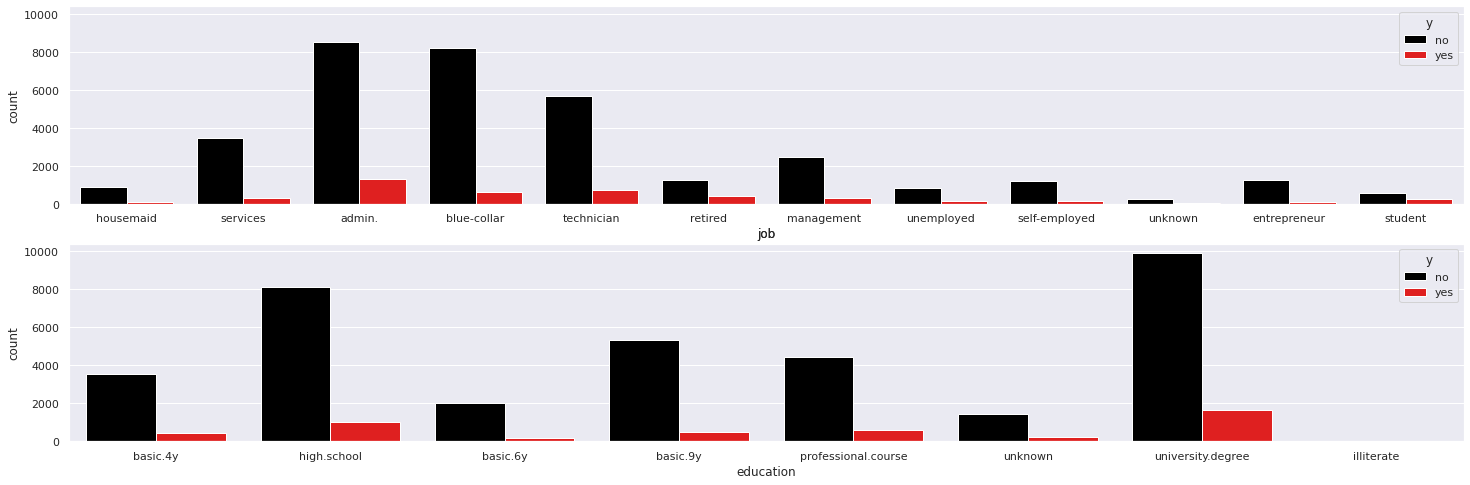

In [ ]:
#plotting job and education w.r.t desposit(yes,no)
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="job", data=cate, hue="y", ax=axes[0],palette=['black','red'])
sns.countplot(x="education", data=cate, hue="y", ax=axes[1],palette=['black','red'])
plt.title("job")
plt.show()

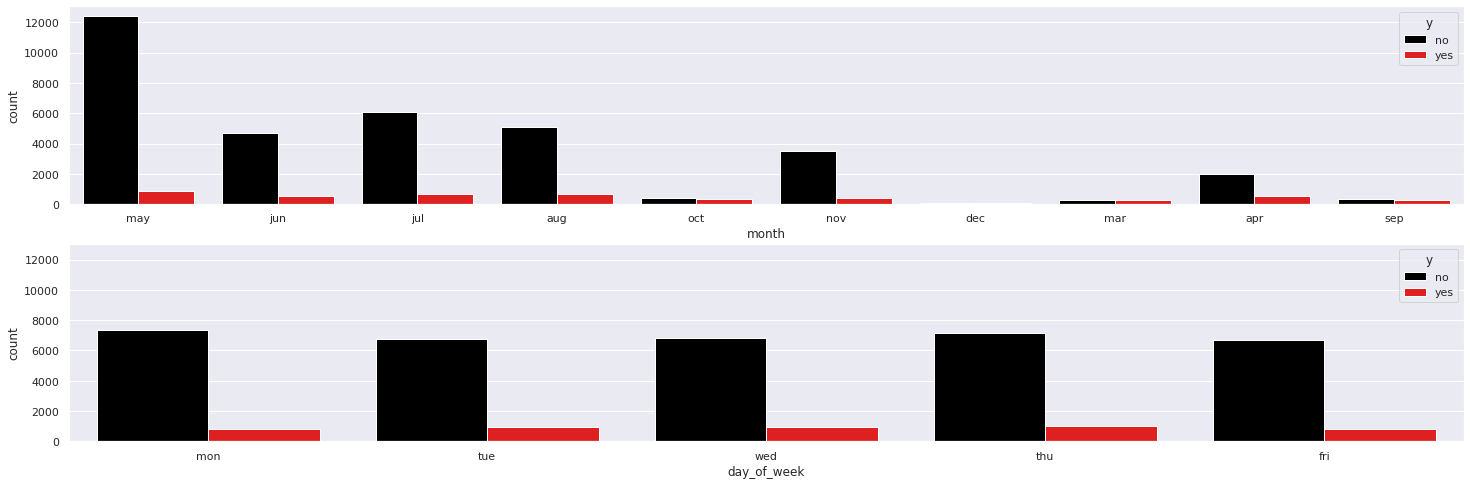

In [ ]:
#plotting month,week_of_week w.r.t target variable 
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="month", data=cate, hue="y", ax=axes[0],palette=['black','red'])
sns.countplot(x="day_of_week", data=cate, hue="y", ax=axes[1],palette=['black','red'])
plt.show()

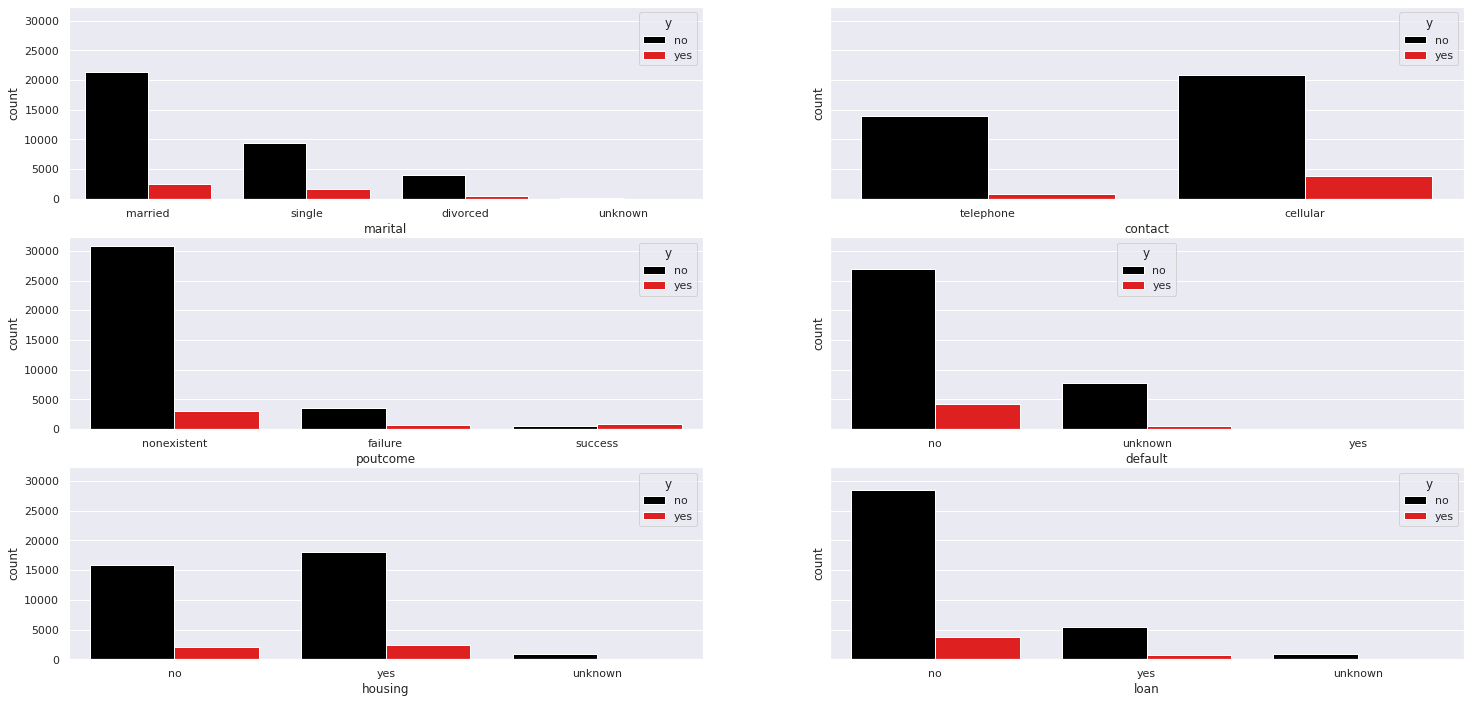

In [ ]:
#plotting features w.r.t response class
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="marital", data=cate, hue="y", ax=axes[0,0],palette=['black','red'])
sns.countplot(x="contact", data=cate, hue="y", ax=axes[0,1],palette=['black','red'])
sns.countplot(x="poutcome", data=cate ,hue="y", ax=axes[1,0],palette=['black','red'])
sns.countplot(x="default", data=cate, hue="y", ax=axes[1,1],palette=['black','red'])
sns.countplot(x="housing", data=cate, hue="y", ax=axes[2,0],palette=['black','red'])
sns.countplot(x="loan",  data=cate, hue="y", ax=axes[2,1],palette=['black','red'])
plt.show()

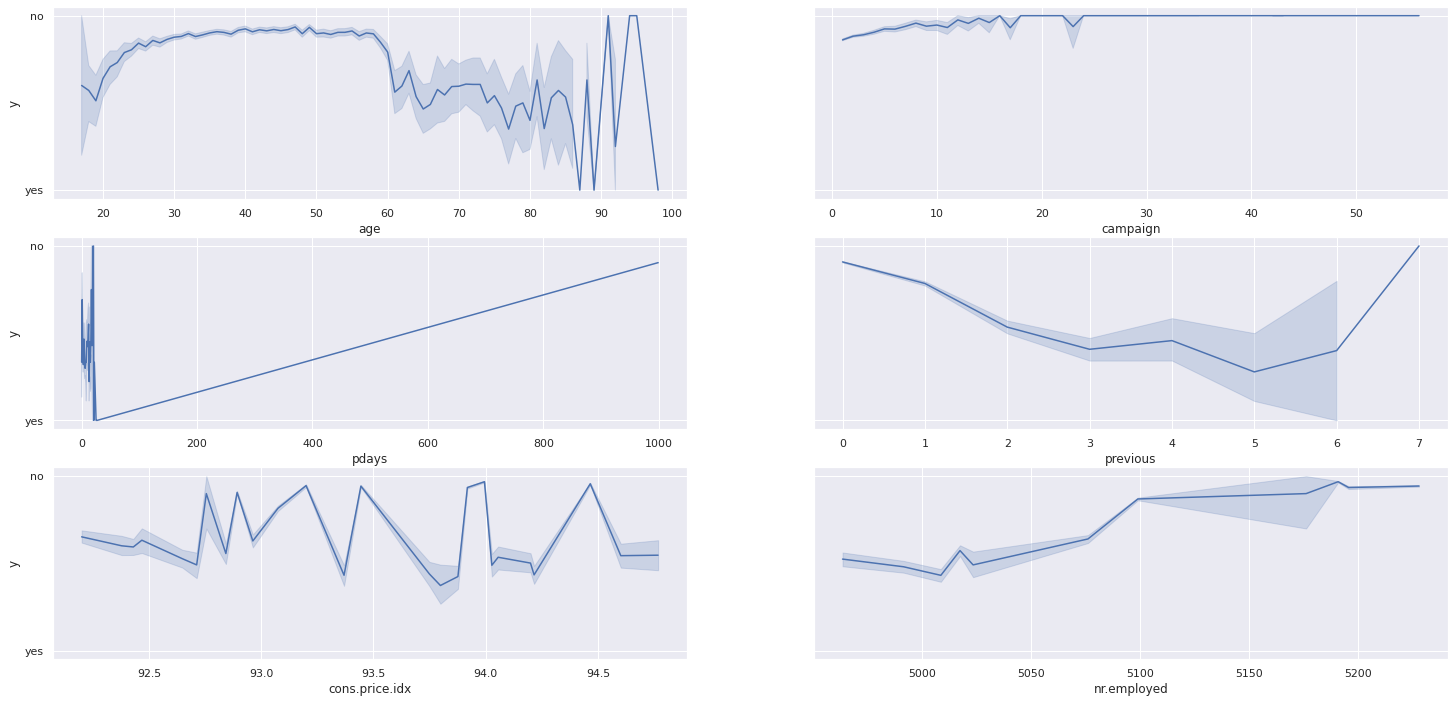

In [ ]:
#for continus data analysis w.r.t target variable 
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.lineplot(x='age',y='y',data=dataset,ax=axes[0,0])
sns.lineplot(x='campaign',y='y',data=dataset,ax=axes[0,1])
sns.lineplot(x='pdays',y='y',data=dataset,ax=axes[1,0])
sns.lineplot(x='previous',y='y',data=dataset,ax=axes[1,1])
sns.lineplot(x='cons.price.idx',y='y',data=dataset,ax=axes[2,0])
sns.lineplot(x='nr.employed',y='y',data=dataset,ax=axes[2,1])
plt.show()

#### 3. Insight from the dataset w.r.t target variable 

- The most deposits were made by administrators followed by technicians because they are those with higher   incomes. Unemployed, housemaids and self-employed people made the least deposits because they do not have much income and most of them live on end to meet their needs.

- Individuals with a higher education background are more likely to sign up for a term deposit.

- May was the month with the most clients signing up for term deposits followed by June, July, August, and April.

- About 14k to 16k individuals signed up to receive a term deposit subscription each business day.(" Monday to Friday")

- The above graph shows a higher number of married couples taking term deposits, but single individuals took more relatively .

- Cellular is the  main way to communicate  with clients.

- Those whose credit is not in default are more likely to sign up for term deposits.

- The taking out of a housing loan does not have an impact on a business.

- Individuals who have not taken out a personal loan are more likely to invest in a term deposit.
- Following 3-6 contacts with the client prior to the campaign, it is more likely that agree for a term deposit
- A majority of seniors are interested in a term deposit

In [ ]:
# copy df to new df
df1=dataset.copy()

In [ ]:
#convert target variable into nuneric
deposit_map={'no':0,'yes':1}
dataset['y']=dataset['y'].map(deposit_map)

### 3.3  Correlation

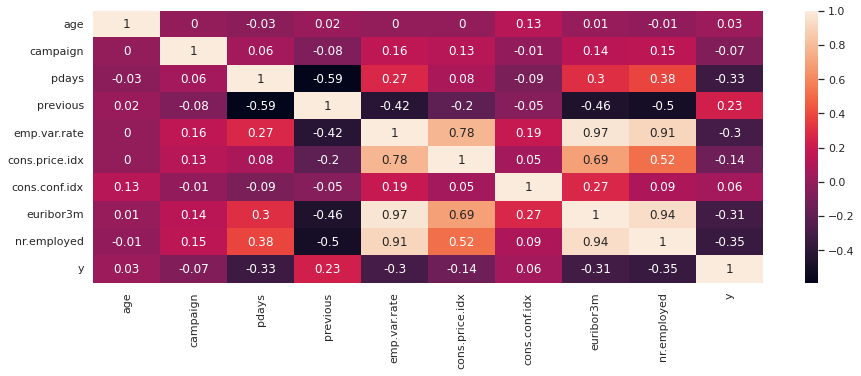

In [ ]:
##correlation matrix
corr=round(dataset.corr(),2)
fix, ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(corr, ax=ax,annot=True)
plt.show()

 #### age, previous, cons.conf.idx has positive correlation with target variable 

## 4. Feature Engineering
  - 1. Data encoding 
  - 2. Data Scaling
  - 3. SMOTE Analysis

### 4.1 Data encoding

In [ ]:
#one hot encoding 
deposit_map={'yes':1,'no':0}
df1['y']=df1['y'].map(deposit_map)
contact_map={'telephone':0,'cellular':1}
df1['contact']=df1['contact'].map(contact_map)

#mean encoding ,job, default,housing, loan,month, day_of_week,poutcome
job_map=df1.groupby(['job'])['y'].mean().to_dict()
df1.job=df1.job.map(job_map)
month_map=df1.groupby(['month'])['y'].mean().to_dict()
df1.month=df1.month.map(month_map)
weekd_map=df1.groupby(['day_of_week'])['y'].mean().to_dict()
df1.day_of_week=df1.day_of_week.map(weekd_map)
marital_map=df1.groupby(['marital'])['y'].mean().to_dict()
df1.marital=df1.marital.map(marital_map)

default_map=df1.groupby(['default'])['y'].mean().to_dict()
df1.default=df1.default.map(default_map)
housing_map=df1.groupby(['housing'])['y'].mean().to_dict()
df1.housing=df1.housing.map(housing_map)
loan_map=df1.groupby(['loan'])['y'].mean().to_dict()
df1.loan=df1.loan.map(loan_map)
poutcome_map=df1.groupby(['poutcome'])['y'].mean().to_dict()
df1.poutcome=df1.poutcome.map(poutcome_map)

#replace 99 with 0
df1.pdays=df1.pdays.replace(999,0)

#emp.var.rate convert into positive 
df1['emp.var.rate']=df1['emp.var.rate'].apply(lambda x: x*-1 if x<0 else x*1)
# change the range for these two cols consumer price * 100,euribor3m *100
df1['cons.price.idx']=df1['cons.price.idx']*100
df1['euribor3m']=df1['euribor3m']*100    
#cons.conf.idx * -1 to convert into positive
df1['cons.conf.idx']=df1['cons.conf.idx'].apply(lambda x: x*-1 if x<0 else x*1)

In [ ]:
# Ordinal encoding 
#.education,
education_map={'unknown':0,'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4, 'high.school':5,'professional.course':6,'university.degree':7}
df1.education=df1.education.map(education_map)


In [ ]:
#df after encoding 
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.103113,0.105409,2,0.133483,0.112635,0.118116,0,0.066241,0.102833,1,0,0,0.091588,1.1,9399.4,36.4,485.7,5191.0,0
1,57,0.084715,0.105409,5,0.053472,0.112635,0.118116,0,0.066241,0.102833,1,0,0,0.091588,1.1,9399.4,36.4,485.7,5191.0,0
2,37,0.084715,0.105409,5,0.133483,0.120568,0.118116,0,0.066241,0.102833,1,0,0,0.091588,1.1,9399.4,36.4,485.7,5191.0,0
3,40,0.135217,0.105409,3,0.133483,0.112635,0.118116,0,0.066241,0.102833,1,0,0,0.091588,1.1,9399.4,36.4,485.7,5191.0,0
4,56,0.084715,0.105409,5,0.133483,0.112635,0.110427,0,0.066241,0.102833,1,0,0,0.091588,1.1,9399.4,36.4,485.7,5191.0,0


In [ ]:
#check data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39404 entries, 0 to 39403
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  float64
 2   marital         39404 non-null  float64
 3   education       39404 non-null  int64  
 4   default         39404 non-null  float64
 5   housing         39404 non-null  float64
 6   loan            39404 non-null  float64
 7   contact         39404 non-null  int64  
 8   month           39404 non-null  float64
 9   day_of_week     39404 non-null  float64
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  float64
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

### 4.2 Scaling

In [ ]:
#Applying MinMaxScaler 
scaler=MinMaxScaler()

In [ ]:
#unscaled data 
data_unscaled=df1.copy()

In [ ]:
#Fit to data, then transform it.
df1['campaign']=scaler.fit_transform(df1[['campaign']])
df1['pdays']=scaler.fit_transform(df1[['pdays']])
df1['emp.var.rate']=scaler.fit_transform(df1[['emp.var.rate']])
df1['cons.price.idx']=scaler.fit_transform(df1[['cons.price.idx']])
df1['previous']=scaler.fit_transform(df1[['previous']])
df1['cons.conf.idx']=scaler.fit_transform(df1[['cons.conf.idx']])
df1['nr.employed']=scaler.fit_transform(df1[['nr.employed']])
df1['euribor3m']=scaler.fit_transform(df1[['euribor3m']])
df1['age']=scaler.fit_transform(df1[['age']])
df1['job']=scaler.fit_transform(df1[['job']])
df1['month']=scaler.fit_transform(df1[['month']])
df1['education']=scaler.fit_transform(df1[['education']])
df1['day_of_week']=scaler.fit_transform(df1[['day_of_week']])
df1['marital']=scaler.fit_transform(df1[['marital']])
df1['default']=scaler.fit_transform(df1[['default']])
df1['housing']=scaler.fit_transform(df1[['housing']])
df1['loan']=scaler.fit_transform(df1[['loan']])
df1['poutcome']=scaler.fit_transform(df1[['poutcome']])


### 4.3 Multicolinearity 

In [ ]:
# Finding Higly Correlated Columns
def correlation(data,threshold):
    col_corr=set()
    cor=data.corr()
    for i in range(len(cor.columns)):
        for j in range(len(cor.columns)):
            if (abs(cor.iloc[i,j]) > threshold) and i!=j:
                if (cor.columns[j] in col_corr) or (cor.columns[i] in col_corr):
                    continue
                print("\n",cor.columns[i],"-----",cor.columns[j])
                print(abs(cor.iloc[i,j]))
                colname=cor.columns[i]
                col_corr.add(colname)
    return col_corr

a=correlation(df1.drop(['y'],axis=1),0.8)
print('\n',a)


 euribor3m ----- nr.employed
0.9445732663476352

 {'euribor3m'}


In [ ]:
# drop euribor3m since it has high colinearity with nr.employed
df1=df1.drop(['euribor3m'],axis=1)

In [ ]:
# removing 

###  4.4  SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE
X=df1.drop(['y'],axis=1)
y=df1['y']
smote=SMOTE(k_neighbors=12,sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)

In [ ]:
data=pd.merge(X_smote,y_smote,left_index=True,right_index=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,0.481481,0.127688,0.000000,0.285714,1.00000,0.303168,1.000000,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.303030,0.698753,0.397490,0.859735,0
1,0.493827,0.053028,0.000000,0.714286,0.40059,0.303168,1.000000,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.303030,0.698753,0.397490,0.859735,0
2,0.246914,0.053028,0.000000,0.714286,1.00000,1.000000,1.000000,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.303030,0.698753,0.397490,0.859735,0
3,0.283951,0.257967,0.000000,0.428571,1.00000,0.303168,1.000000,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.303030,0.698753,0.397490,0.859735,0
4,0.481481,0.053028,0.000000,0.714286,1.00000,0.303168,0.139248,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.303030,0.698753,0.397490,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69607,0.271306,0.152527,0.858327,0.970736,1.00000,0.303168,1.000000,1,0.088467,0.000000,0.065278,0.0,0.000000,0.000000,1.000000,0.174591,0.133891,0.203781,1
69608,0.111638,0.257967,0.858327,1.000000,1.00000,1.000000,1.000000,1,0.108302,0.823166,0.012380,0.0,0.000000,0.000000,0.848485,0.000000,0.188285,0.425709,1
69609,0.149940,0.754993,0.858327,0.571429,1.00000,0.074278,0.034117,1,0.872137,0.834864,0.004455,0.0,0.035001,0.023134,1.000000,0.074334,0.091610,0.203781,1
69610,0.153098,0.257967,0.000000,0.992841,1.00000,1.000000,0.139248,1,0.326842,0.753309,0.003645,0.0,0.000000,0.000000,0.515152,0.340608,0.845188,0.512287,1


In [ ]:
#after smote
Counter(data['y'])

Counter({0: 34806, 1: 34806})

## 5. Modeling and Model Evaluation
 1. Logistic regression
 2. RandomForest
 3. XGBoostClassifier
 4. ROC Curve
 5. Classification report
  

In [ ]:
#separate independent variable and target variable    #df1
X=data.loc[:,"age":"nr.employed"]
y=data.y

In [ ]:
# traing the data, test_size=0.3 means testing data is 30%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)


X_train: (48728, 18)
y_train: (48728,)
X_test: (20884, 18)
y_test: (20884,)


In [ ]:
#Model Evaluation

---------------------Logisitic Regression----------------------------------------------
1.Logistic Regression  model  Accuracy :  0.7307986975675158
2.Logistic Regression Training Accuracy :  0.7326588409128222
3.Logistic Regression testing  Accuracy :  0.7307986975675158
LogisticRegression() AUC: 0.7316
---------------------------------RandomForestClassifier----------------------------------
1.Random Forest model  Accuracy :  0.9299463704271212
2.Randome Forest  Training Accuracy :  0.9966549006731242
3.Random Forest testing Accuracy :  0.9299463704271212
RandomForestClassifier() AUC: 0.9301
---------------------------------XGBoostClassifer----------------------------------
1.XGBoostClassifier model  Accuracy :  0.9355966289982762
2.XGBoostClassifier Training Accuracy :  0.9514037103923823
3.XGBoostClassifier testing Accuracy :  0.9355966289982762
XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10) AUC: 0.9358


(LogisticRegression(),
 RandomForestClassifier(),
 XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10))

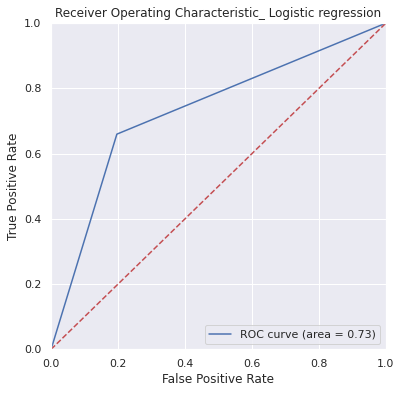

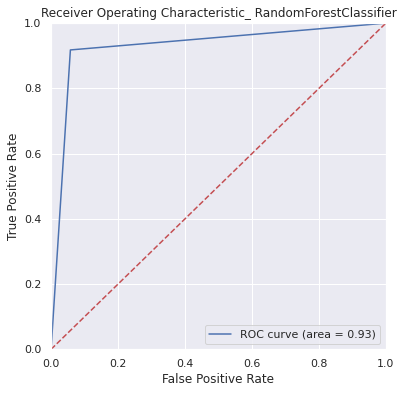

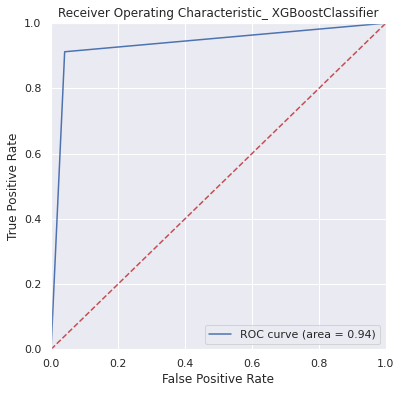

In [ ]:
#function to check which model performance well
def  classification_models(X_train,y_train):
    
    #Logistic Regression 
    log_model=LogisticRegression( )
    log_model.fit(X_train,y_train)
    log_pred=log_model.predict(X_test)

    
    #Random Forest
    RForest=RandomForestClassifier()
    RForest.fit(X_train,y_train)
    RForest_pred=RForest.predict(X_test)
    
    #XGBoost
    xgb_model=XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1)
    xgb_model.fit(X_train,y_train)
    xgb_pred=xgb_model.predict(X_test)

    
    #print the accuracy
    print("---------------------Logisitic Regression----------------------------------------------")
    print('1.Logistic Regression  model  Accuracy : ',accuracy_score(y_test,log_pred))
    print('2.Logistic Regression Training Accuracy : ',log_model.score(X_train, y_train))
    print('3.Logistic Regression testing  Accuracy : ',log_model.score(X_test, y_test))
    #ROC curve for Logistic Regression model
    fpr, tpr, thresholds = roc_curve(y_test, log_pred)
    model_auc = auc(fpr, tpr)
    print(log_model, 'AUC: {:.4f}'.format(model_auc))
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic_ Logistic regression')
    plt.legend(loc="lower right")
    
    print("---------------------------------RandomForestClassifier----------------------------------")
    print('1.Random Forest model  Accuracy : ',accuracy_score(y_test, RForest_pred))
    print('2.Randome Forest  Training Accuracy : ',RForest.score(X_train, y_train))
    print('3.Random Forest testing Accuracy : ',RForest.score(X_test, y_test))

    #ROC curve for RandomForest model
    fpr, tpr, thresholds = roc_curve(y_test, RForest_pred)
    model_auc = auc(fpr, tpr)
    print(RForest, 'AUC: {:.4f}'.format(model_auc))
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic_ RandomForestClassifier')
    plt.legend(loc="lower right")

    print("---------------------------------XGBoostClassifer----------------------------------")
    print('1.XGBoostClassifier model  Accuracy : ',accuracy_score(y_test, xgb_pred))
    print('2.XGBoostClassifier Training Accuracy : ',xgb_model.score(X_train, y_train))
    print('3.XGBoostClassifier testing Accuracy : ',xgb_model.score(X_test, y_test))

  #ROC curve for XGBoostClassifier model
    fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)
    model_auc = auc(fpr, tpr)
    print(xgb_model, 'AUC: {:.4f}'.format(model_auc))
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic_ XGBoostClassifier')
    plt.legend(loc="lower right")

    return log_model, RForest,xgb_model

model=classification_models(X_train,y_train)
model  

In [ ]:
#Classification report
for i in range (len(model)):
    print('Model :',model[i])
    print(classification_report(y_test,model[i].predict(X_test)))
    print(accuracy_score(y_test,model[i].predict(X_test)))
    print()

Model : LogisticRegression()
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      8594
           1       0.77      0.66      0.71      8809

    accuracy                           0.73     17403
   macro avg       0.74      0.73      0.73     17403
weighted avg       0.74      0.73      0.73     17403

0.7309084640579211

Model : RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8594
           1       0.94      0.92      0.93      8809

    accuracy                           0.93     17403
   macro avg       0.93      0.93      0.93     17403
weighted avg       0.93      0.93      0.93     17403

0.9310463713152904

Model : XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10)
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8594
           1       0.96      0.91      0.94   

### 6. Conclusion
1. XGBoostClassifier model achieves an accuracy of  93% and sensitivity(recall) of 96% for "No" deposit class and 91% for "Yes" deposit class respectively which is way better than Logistic regression and RandomForestClassifier.

2. A receiver operating characteristic curve(ROC) is used to illustrate the performance of a classification model at all classification thresholds. 
- The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at     various threshold settings
- True-positive rates may also be referred to as sensitivity, recall, or probability of detection, while false-   positive rates may be referred to as probability of false alarm.  
- The true positives are shown on the y-axis and the false positives are shown on the x-axis
-  The classifier that gives the curve close to the top-left corner has better performance, therefore our XGBoostClassifier have performed at a higher level.
